In [1]:
from MACD import addMACD
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#Create dataframe and define price and macd series for testing
s = yf.Ticker("AMZN")
df = s.history(period = "5y", i = "1d").loc[:, ["Open", "High", "Low", "Close", "Volume"]]
df = addMACD(df)
macd = df["MACDCrossover"]
price = (df["High"] + df["Low"] + df["Close"])/3

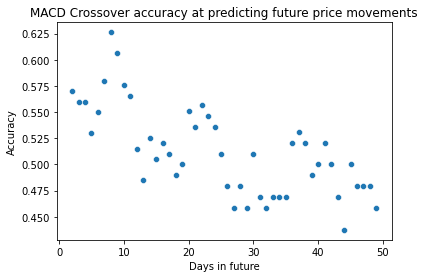

In [11]:
#Accuracy of MACD Crossover
days = []
accuracy = [] 
for i in range(2,50):
    ts = 0 #initialize true signal
    fs = 0 # initialize false signal
    for j in range(0, len(macd)-i):
        if macd[j] == "Sell" and price[j] < price[j+i]: #Short position but price increases
            fs += 1
        elif macd[j] == "Buy" and price[j] > price[j+i]: #long position but price decreases
            fs += 1 
        elif macd[j] == "Buy" and price[j] < price[j+i]: #long position and price increases
            ts += 1
        elif macd[j] == "Sell" and price[j] > price[j+i]: #short position and price decreases
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

graph = sns.scatterplot(x=days, y = accuracy)
graph.set(title = "MACD Crossover accuracy at predicting future price movements", xlabel = "Days in future", ylabel = "Accuracy")
plt.show()